In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
car = pd.read_csv('carclaims.csv')
car.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


## dropping repeated column

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [4]:
car['BasePolicy']

0         Liability
1         Collision
2         Collision
3         Liability
4         Collision
            ...    
15415     Collision
15416     Liability
15417     Collision
15418    All Perils
15419     Collision
Name: BasePolicy, Length: 15420, dtype: object

In [5]:
car['PolicyType']

0         Sport - Liability
1         Sport - Collision
2         Sport - Collision
3         Sedan - Liability
4         Sport - Collision
                ...        
15415     Sedan - Collision
15416     Sedan - Liability
15417     Sedan - Collision
15418    Sedan - All Perils
15419     Sedan - Collision
Name: PolicyType, Length: 15420, dtype: object

In [6]:
car['VehicleCategory']

0        Sport
1        Sport
2        Sport
3        Sport
4        Sport
         ...  
15415    Sedan
15416    Sport
15417    Sedan
15418    Sedan
15419    Sedan
Name: VehicleCategory, Length: 15420, dtype: object

In [7]:
car['AgeOfPolicyHolder']

0        26 to 30
1        31 to 35
2        41 to 50
3        51 to 65
4        31 to 35
           ...   
15415    31 to 35
15416    31 to 35
15417    26 to 30
15418    31 to 35
15419    26 to 30
Name: AgeOfPolicyHolder, Length: 15420, dtype: object

In [8]:
car['Age']

0        21
1        34
2        47
3        65
4        27
         ..
15415    35
15416    30
15417    24
15418    34
15419    21
Name: Age, Length: 15420, dtype: int64

 1. Droping $VehicleCategory$ and $BasePolicy$ as $PolicyType has both that column as one.
 
 2. Droping $AgeOfPolicyHolder$ as $Age$ has the same value.

In [9]:
car1= car.drop('BasePolicy',axis = 1)
car1.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,No


In [10]:
car1= car1.drop('VehicleCategory',axis = 1)
car1.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,No


In [11]:
car1= car1.drop('AgeOfPolicyHolder',axis = 1)
car1.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,none,3 years,No,No,External,none,1 year,3 to 4,1994,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,none,6 years,Yes,No,External,none,no change,1 vehicle,1994,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,1,7 years,No,No,External,none,no change,1 vehicle,1994,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,1,more than 7,Yes,No,External,more than 5,no change,1 vehicle,1994,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,none,5 years,No,No,External,none,no change,1 vehicle,1994,No


In [11]:
le = LabelEncoder()

cols = car1.select_dtypes('O').columns

car1[cols]= car1[cols].apply(le.fit_transform)
car1['Year'] = le.fit_transform(car1.Year) 

In [64]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Month                 15420 non-null  int32
 1   WeekOfMonth           15420 non-null  int64
 2   DayOfWeek             15420 non-null  int32
 3   Make                  15420 non-null  int32
 4   AccidentArea          15420 non-null  int32
 5   DayOfWeekClaimed      15420 non-null  int32
 6   MonthClaimed          15420 non-null  int32
 7   WeekOfMonthClaimed    15420 non-null  int64
 8   Sex                   15420 non-null  int32
 9   MaritalStatus         15420 non-null  int32
 10  Age                   15420 non-null  int64
 11  Fault                 15420 non-null  int32
 12  PolicyType            15420 non-null  int32
 13  VehiclePrice          15420 non-null  int32
 14  PolicyNumber          15420 non-null  int64
 15  RepNumber             15420 non-null  int64
 16  Dedu

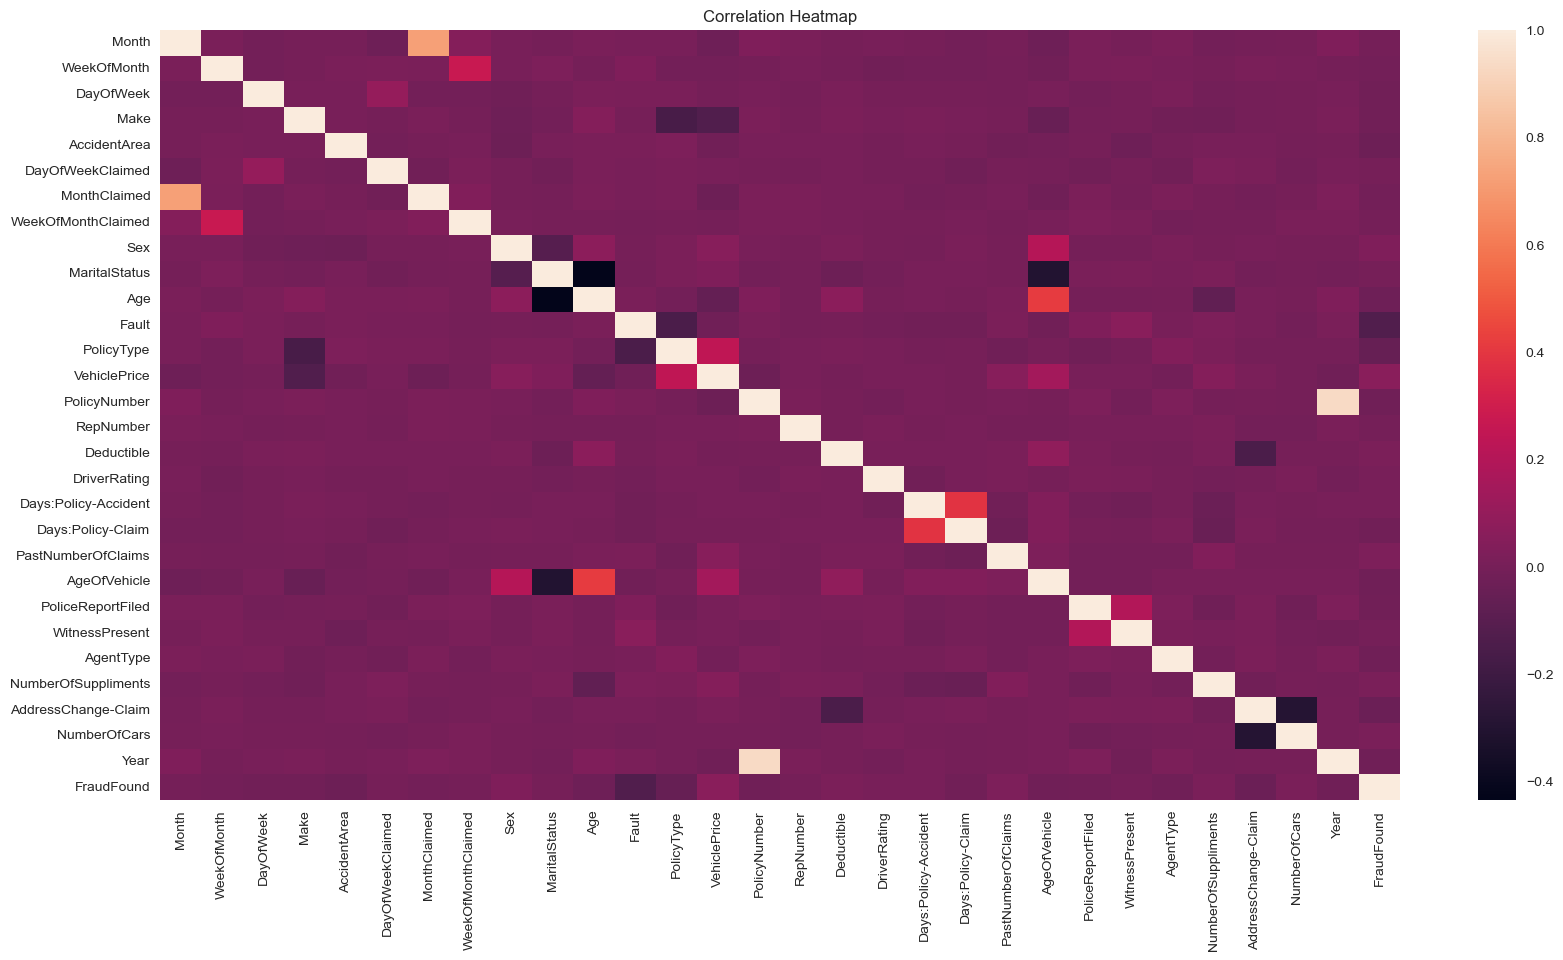

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(car1.corr())
plt.title("Correlation Heatmap")
plt.show()

In [13]:
car1['FraudFound']

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound, Length: 15420, dtype: int32

## feature selection

In [14]:
from sklearn.feature_selection import f_classif,SelectKBest
fs= SelectKBest (score_func=f_classif, k=5)

In [15]:
X = car1.drop('FraudFound',axis=1)
y = car1['FraudFound']

In [16]:
fs.fit(X,y)

SelectKBest(k=5)

In [17]:
fs.get_support()

array([False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False])

In [18]:
print("P_values :")
print(np.round(fs.pvalues_,2))
print("F values :")
print(fs.scores_)

P_values :
[0.28 0.14 0.03 0.02 0.   0.8  0.2  0.47 0.   0.94 0.   0.   0.   0.
 0.01 0.35 0.03 0.37 0.49 0.06 0.   0.01 0.05 0.32 0.   0.1  0.   0.26
 0.  ]
F values :
[1.15901958e+00 2.16953535e+00 4.69945787e+00 5.67796316e+00
 1.73217350e+01 6.57286720e-02 1.61908052e+00 5.11730508e-01
 1.38454759e+01 4.97683767e-03 1.36498495e+01 2.70838424e+02
 5.03565042e+01 5.86141569e+01 6.38423176e+00 8.79207028e-01
 4.64142012e+00 8.14055899e-01 4.71283116e-01 3.65741141e+00
 8.42054414e+00 7.62733862e+00 3.95165492e+00 1.00100127e+00
 8.14497150e+00 2.71317152e+00 2.18745672e+01 1.27947453e+00
 9.45766298e+00]


In [19]:
feature_score = pd.DataFrame(fs.scores_)
feature_pvalue = pd.DataFrame(np.round(fs.pvalues_,))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,feature_score, feature_pvalue],axis=1)
feature_score.columns = ["Input_features", "Score", "P_value"]
print(feature_score.nlargest(5,columns='Score'))

         Input_features       Score  P_value
11                Fault  270.838424      0.0
13         VehiclePrice   58.614157      0.0
12           PolicyType   50.356504      0.0
26  AddressChange-Claim   21.874567      0.0
4          AccidentArea   17.321735      0.0


In [20]:
car['PolicyType']

0         Sport - Liability
1         Sport - Collision
2         Sport - Collision
3         Sedan - Liability
4         Sport - Collision
                ...        
15415     Sedan - Collision
15416     Sedan - Liability
15417     Sedan - Collision
15418    Sedan - All Perils
15419     Sedan - Collision
Name: PolicyType, Length: 15420, dtype: object

In [49]:
cat_feat = ['Fault','VehiclePrice','PolicyType','AddressChange-Claim','AccidentArea']

In [50]:
experiment = setup(car1, target='FraudFound', categorical_features=cat_feat)

,Description,Value
0,Session id,8531
1,Target,FraudFound
2,Target type,Binary
3,Original data shape,"(15420, 30)"
4,Transformed data shape,"(15420, 46)"
5,Transformed train set shape,"(10794, 46)"
6,Transformed test set shape,"(4626, 46)"
7,Ordinal features,2
8,Numeric features,24
9,Categorical features,5


In [23]:
best1_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9520,0.9531,0.3156,0.7313,0.4380,0.4173,0.4591,0.6340
lightgbm,Light Gradient Boosting Machine,0.9459,0.9333,0.1516,0.7342,0.2476,0.2324,0.3133,0.5280
gbc,Gradient Boosting Classifier,0.9424,0.8706,0.0479,0.8500,0.0900,0.0840,0.1896,0.6520
rf,Random Forest Classifier,0.9406,0.8405,0.0093,0.4667,0.0181,0.0169,0.0618,0.5630
et,Extra Trees Classifier,0.9406,0.8213,0.0139,0.5667,0.0270,0.0247,0.0819,0.5660
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3760
lr,Logistic Regression,0.9401,0.7945,0.0000,0.0000,0.0000,-0.0002,-0.0008,1.1650
ridge,Ridge Classifier,0.9401,0.0000,0.0000,0.0000,0.0000,-0.0002,-0.0008,0.3560
knn,K Neighbors Classifier,0.9381,0.5376,0.0046,0.0667,0.0086,0.0037,0.0060,0.6400
svm,SVM - Linear Kernel,0.9374,0.0000,0.0046,0.0477,0.0080,0.0025,0.0047,0.4030


In [51]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9454,0.9461,0.2615,0.6071,0.3656,0.3417,0.3752
1,0.9537,0.9585,0.3692,0.7273,0.4898,0.4682,0.4980
2,0.9574,0.9502,0.3385,0.8800,0.4889,0.4712,0.5306
3,0.9509,0.9456,0.2923,0.7308,0.4176,0.3968,0.4428
4,0.9518,0.9472,0.3594,0.6765,0.4694,0.4466,0.4713
5,0.9574,0.9580,0.3750,0.8000,0.5106,0.4914,0.5303
6,0.9453,0.9472,0.2188,0.6087,0.3218,0.2999,0.3432
7,0.9546,0.9641,0.3125,0.8000,0.4494,0.4305,0.4829
8,0.9527,0.9547,0.2615,0.8500,0.4000,0.3825,0.4561


In [53]:
 tunexgb=tune_model(xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9398,0.8100,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9398,0.7956,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9398,0.7434,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9398,0.7151,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9407,0.7590,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9407,0.8088,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9407,0.7907,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9407,0.7863,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9398,0.7745,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


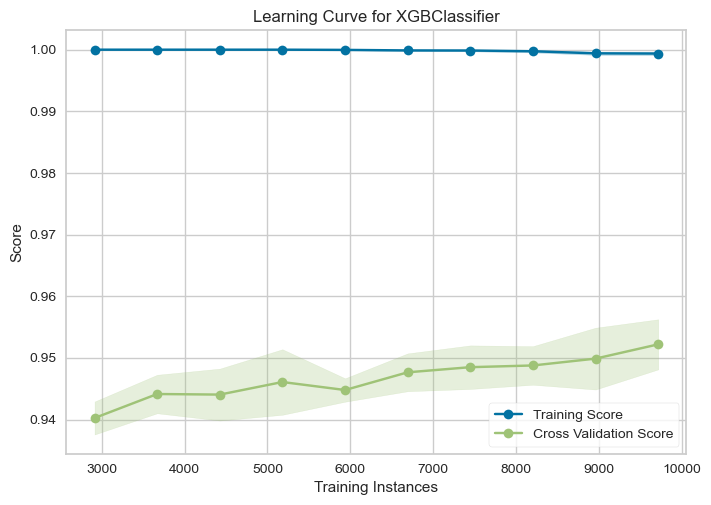

In [55]:
plot_model(estimator = xgb, plot = 'learning')

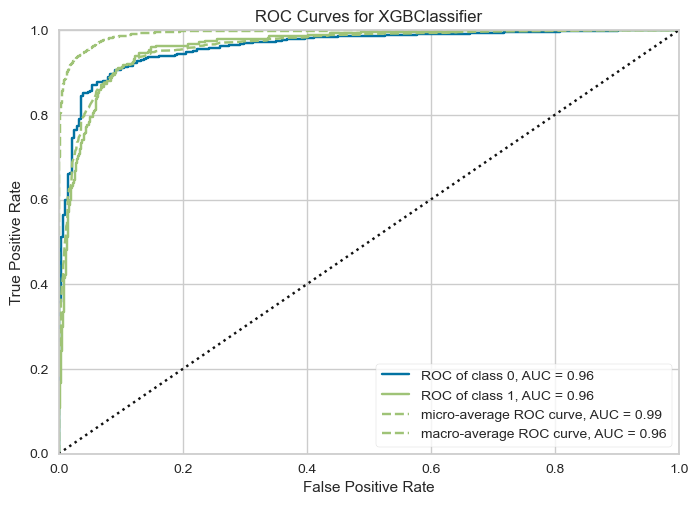

In [56]:
plot_model(estimator = xgb, plot = 'auc')

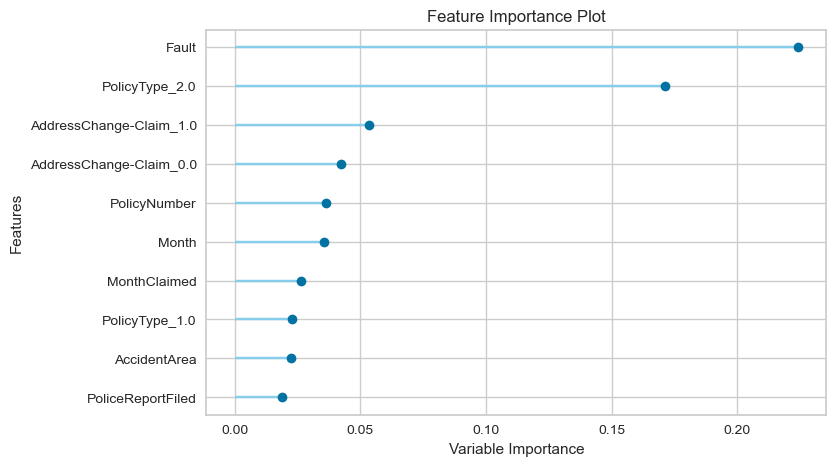

In [54]:
plot_model(estimator = xgb, plot = 'feature')

In [69]:
predict_model(xgb, data=car1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9846,0.9909,0.7757,0.9585,0.8575,0.8494,0.8547


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,FraudFound,prediction_label,prediction_score
0,2,5,6,6,1,6,5,1,0,2,...,0,0,0,3,0,2,0,0,0,0.9458
1,4,3,6,6,1,2,5,4,1,2,...,1,0,0,3,3,0,0,0,0,0.9152
2,10,5,0,6,1,5,10,2,1,1,...,0,0,0,3,3,0,0,0,0,0.9918
3,6,2,2,17,0,1,6,1,1,1,...,1,0,0,2,3,0,0,0,0,1.0000
4,4,5,1,6,1,6,4,2,0,2,...,0,0,0,3,3,0,0,0,0,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,6,10,5,1,1,...,0,0,0,3,3,0,2,1,1,0.9930
15416,9,5,4,13,1,1,3,1,1,1,...,0,0,0,2,3,2,2,0,0,0.9474
15417,9,5,4,17,0,1,3,1,1,2,...,0,0,0,0,3,0,2,1,1,0.9647
15418,2,1,1,17,1,5,3,2,0,1,...,0,0,0,2,3,0,2,0,0,0.9988


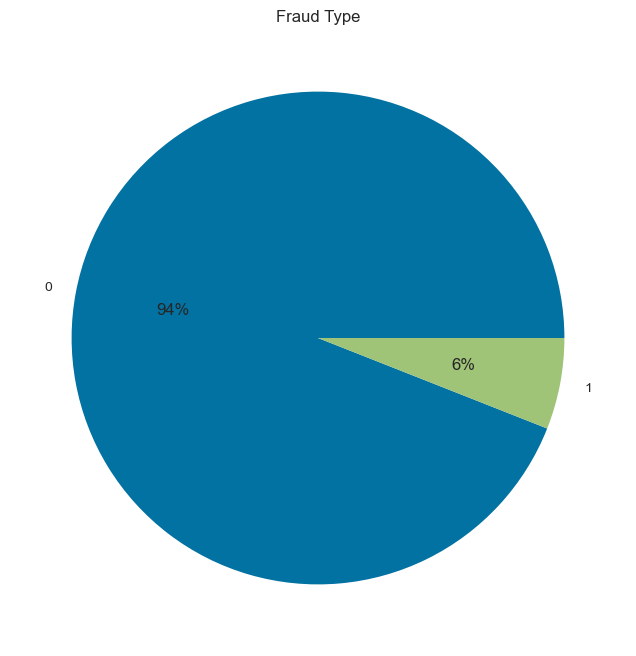

In [24]:
plt.figure(figsize=(10,8))
plt.pie(car1.FraudFound.value_counts().values,labels=car1.FraudFound.value_counts().index,  autopct='%.0f%%')
plt.title("Fraud Type")
plt.show()

In [25]:
evaluate_model(best1_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [6]:
from imblearn.over_sampling import SMOTE
X1,y1 = SMOTE(random_state=42).fit_resample(X,y)

NameError: name 'X' is not defined

In [ ]:
print('original sample:', np.unique(y,return_counts=True))
print('after smote:' , np.unique(y1,return_counts=True))

In [ ]:
fs.fit(X1,y1)

In [42]:
print("P_values :")
print(np.round(fs.pvalues_,6))
print("F values :")
print(fs.scores_)

P_values :
[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.054605 0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.      ]
F values :
[2.58649946e+01 1.39398980e+02 5.23865788e+02 2.30100608e+02
 1.37935714e+03 2.43225423e+02 8.80371323e+01 6.16614506e+02
 1.04304975e+02 1.71275844e+03 1.98108089e+02 5.53225091e+03
 1.87270699e+03 2.57119551e+01 5.45142188e+01 1.35334841e+02
 3.69441470e+00 7.23446436e+02 5.71470750e+01 9.93276358e+01
 3.41967436e+02 1.44217245e+03 3.31546156e+02 7.58333820e+01
 2.28931573e+02 4.41457463e+02 3.52036502e+02 2.28511274e+02
 9.15216322e+01]


In [43]:
feature_score = pd.DataFrame(fs.scores_)
feature_pvalue = pd.DataFrame(np.round(fs.pvalues_,))
features = pd.DataFrame(X1.columns)
feature_score = pd.concat([features,feature_score, feature_pvalue],axis=1)
feature_score.columns = ["Input_features", "Score", "P_value"]
print(feature_score.nlargest(5,columns='Score'))

   Input_features        Score  P_value
11          Fault  5532.250906      0.0
12     PolicyType  1872.706990      0.0
9   MaritalStatus  1712.758438      0.0
21   AgeOfVehicle  1442.172445      0.0
4    AccidentArea  1379.357139      0.0


In [4]:
cat1_feat = ['Fault','PolicyType','MaritalStatus','AgeOfVehicle','AccidentArea']

In [5]:
experiment1 = setup(car1, target='FraudFound', categorical_features=cat1_feat)

NameError: name 'setup' is not defined

In [46]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9501,0.9577,0.3005,0.6943,0.4159,0.3943,0.4340,0.8090
lightgbm,Light Gradient Boosting Machine,0.9454,0.9336,0.1470,0.7114,0.2413,0.2259,0.3044,0.8070
gbc,Gradient Boosting Classifier,0.9427,0.8870,0.0495,0.8300,0.0932,0.0874,0.1933,0.8500
ridge,Ridge Classifier,0.9402,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5490
rf,Random Forest Classifier,0.9402,0.8361,0.0031,0.2000,0.0061,0.0053,0.0225,0.7690
dummy,Dummy Classifier,0.9402,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5110
lr,Logistic Regression,0.9397,0.7893,0.0016,0.0500,0.0030,0.0018,0.0052,1.3150
et,Extra Trees Classifier,0.9397,0.8140,0.0062,0.2750,0.0120,0.0097,0.0342,0.6910
lda,Linear Discriminant Analysis,0.9396,0.7945,0.0047,0.1833,0.0090,0.0069,0.0220,0.4820
knn,K Neighbors Classifier,0.9389,0.5575,0.0124,0.2833,0.0233,0.0181,0.0450,0.6410


In [33]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [47]:
pred_holdout = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9498,0.9591,0.2744,0.7103,0.3958,0.3750,0.4218


In [3]:
best_model.T.plot(kind="bar")

NameError: name 'best_model' is not defined